In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [54]:
train = pd.read_csv('../data/v2/training_v2.csv')
test = pd.read_csv('../data/v2/test_v2.csv')
test.drop_duplicates(subset=['id'], inplace=True)

In [55]:
train.head()

,application_date,segment,case_count,day,year,month,Holiday,Type,cos_day,sin_day,cos_mon,sin_mon
0,2017-04-01,1,40.0,1,2017,4,NaN,NaN,0.978148,0.207912,-0.5,0.866025
1,2017-04-03,1,5.0,3,2017,4,NaN,NaN,0.809017,0.587785,-0.5,0.866025
2,2017-04-04,1,4.0,4,2017,4,Rama Navami,G,0.669131,0.743145,-0.5,0.866025
3,2017-04-05,1,113.0,5,2017,4,NaN,NaN,0.500000,0.866025,-0.5,0.866025
4,2017-04-07,1,76.0,7,2017,4,NaN,NaN,0.104528,0.994522,-0.5,0.866025


# Separating Segments

In [56]:
seg_1_train = train[train['segment']==1].reset_index(drop=True)
seg_2_train = train[train['segment']==2].reset_index(drop=True)
seg_1_test = test[test['segment']==1].reset_index(drop=True)
seg_2_test = test[test['segment']==2].reset_index(drop=True)

In [57]:
seg_1_train.shape[0], seg_2_train.shape[0], seg_1_test.shape[0], seg_2_test.shape[0]

(68558, 13840, 87, 93)

# Visualizations

In [75]:
from scipy.stats import boxcox

In [83]:
data, e = boxcox(seg_1_train['case_count']+0.1)

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


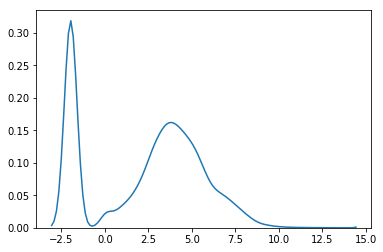

In [85]:
sns.distplot(data, hist=False)

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


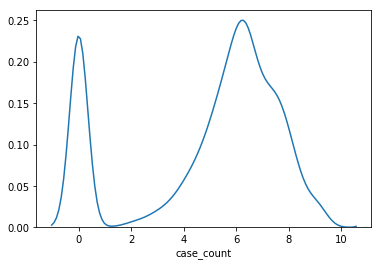

In [59]:
sns.distplot(np.log1p(seg_2_train['case_count']), hist=False)

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


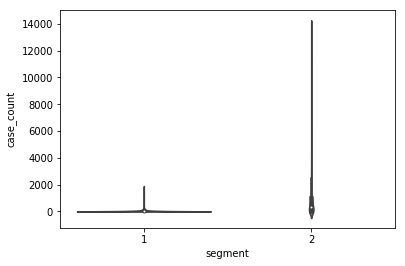

In [60]:
sns.violinplot(x='segment', y='case_count', data=train)

In [61]:
seg_1_train

,application_date,segment,case_count,day,year,month,Holiday,Type,cos_day,sin_day,cos_mon,sin_mon
0,2017-04-01,1,40.0,1,2017,4,NaN,NaN,0.978148,0.207912,-0.500000,0.866025
1,2017-04-03,1,5.0,3,2017,4,NaN,NaN,0.809017,0.587785,-0.500000,0.866025
2,2017-04-04,1,4.0,4,2017,4,Rama Navami,G,0.669131,0.743145,-0.500000,0.866025
3,2017-04-05,1,113.0,5,2017,4,NaN,NaN,0.500000,0.866025,-0.500000,0.866025
4,2017-04-07,1,76.0,7,2017,4,NaN,NaN,0.104528,0.994522,-0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
68553,2019-07-01,1,6.0,1,2019,7,NaN,NaN,0.979530,0.201299,-0.866025,-0.500000
68554,2019-07-02,1,3.0,2,2019,7,NaN,NaN,0.918958,0.394356,-0.866025,-0.500000
68555,2019-07-03,1,3.0,3,2019,7,NaN,NaN,0.820763,0.571268,-0.866025,-0.500000
68556,2019-07-04,1,5.0,4,2019,7,Rath Yatra,R,0.688967,0.724793,-0.866025,-0.500000


In [62]:
a1 = [0] + [i for i in seg_1_train['case_count'].iloc[:-1].tolist()]
a2 = [0] + [0] + [i for i in seg_1_train['case_count'].iloc[:-2].tolist()]
a3 = [0] + [0] + [0] + [i for i in seg_1_train['case_count'].iloc[:-3].tolist()]
a4 = [0] + [0] + [0] + [0] + [i for i in seg_1_train['case_count'].iloc[:-4].tolist()]

In [63]:
seg_1_train['case_count_prev'] = a1
seg_1_train['case_count_prev_2'] = a2
seg_1_train['case_count_prev_3'] = a3
seg_1_train['case_count_prev_4'] = a4

In [315]:
seg_1_train

,application_date,segment,case_count,day,year,month,Holiday,Type,cos_day,sin_day,cos_mon,sin_mon,case_count_prev,case_count_prev_2,case_count_prev_3,case_count_prev_4,day_of_week,day_name
0,2017-04-01,1,40.0,1,2017,4,NaN,NaN,0.978148,0.207912,-0.500000,0.866025,0.0,0.0,0.0,0.0,5,Saturday
1,2017-04-03,1,5.0,3,2017,4,NaN,NaN,0.809017,0.587785,-0.500000,0.866025,40.0,0.0,0.0,0.0,0,Monday
2,2017-04-04,1,4.0,4,2017,4,Rama Navami,G,0.669131,0.743145,-0.500000,0.866025,5.0,40.0,0.0,0.0,1,Tuesday
3,2017-04-05,1,113.0,5,2017,4,NaN,NaN,0.500000,0.866025,-0.500000,0.866025,4.0,5.0,40.0,0.0,2,Wednesday
4,2017-04-07,1,76.0,7,2017,4,NaN,NaN,0.104528,0.994522,-0.500000,0.866025,113.0,4.0,5.0,40.0,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68553,2019-07-01,1,6.0,1,2019,7,NaN,NaN,0.979530,0.201299,-0.866025,-0.500000,0.0,3.0,3.0,3.0,0,Monday
68554,2019-07-02,1,3.0,2,2019,7,NaN,NaN,0.918958,0.394356,-0.866025,-0.500000,6.0,0.0,3.0,3.0,1,Tuesday
68555,2019-07-03,1,3.0,3,2019,7,NaN,NaN,0.820763,0.571268,-0.866025,-0.500000,3.0,6.0,0.0,3.0,2,Wednesday
68556,2019-07-04,1,5.0,4,2019,7,Rath Yatra,R,0.688967,0.724793,-0.866025,-0.500000,3.0,3.0,6.0,0.0,3,Thursday


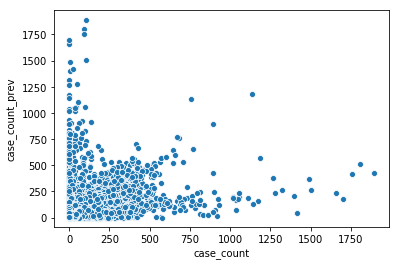

In [68]:
sns.scatterplot(x="case_count", y="case_count_prev", data=seg_1_train)

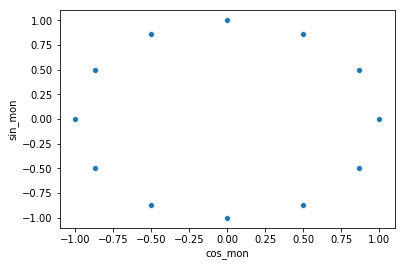

In [69]:
sns.scatterplot(x="cos_mon", y="sin_mon", data=seg_1_train)

In [91]:
seg_1_train.groupby(['Type'])[['segment', 'case_count']].mean()

,segment,case_count
Type,,
C,1,28.385542
G,1,37.500000
M,1,39.799197
O,1,53.387550
R,1,34.659394
S,1,30.906292


In [93]:
seg_2_train.groupby(['Type'])[['segment', 'case_count']].mean()

,segment,case_count
Type,,
C,2,795.979167
G,2,844.376645
M,2,856.333333
O,2,721.878788
R,2,889.755757
S,2,1522.534722


In [121]:
seg_2_train['application_date'] = pd.to_datetime(seg_2_train['application_date'])
seg_2_train['day_of_week'] = seg_2_train['application_date'].apply(lambda x: x.dayofweek)
seg_2_train['day_name'] = seg_2_train['application_date'].apply(lambda x: x.day_name())
seg_2_train['week_num'] = seg_2_train['application_date'].apply(lambda x: x.week)

In [119]:
seg_1_train.groupby(['day_name'])[['segment', 'case_count']].median()

,segment,case_count
day_name,,
Friday,1,16.0
Monday,1,18.0
Saturday,1,12.0
Sunday,1,4.0
Thursday,1,16.0
Tuesday,1,15.0
Wednesday,1,19.0


In [120]:
seg_1_train.groupby(['day_name'])[['segment', 'case_count']].mean()

,segment,case_count
day_name,,
Friday,1,33.347676
Monday,1,39.203604
Saturday,1,30.143007
Sunday,1,19.154238
Thursday,1,33.819476
Tuesday,1,33.434858
Wednesday,1,38.867061


In [124]:
seg_2_train.groupby(['day_name'])[['segment', 'case_count']].median()

,segment,case_count
day_name,,
Friday,2,415.0
Monday,2,362.0
Saturday,2,383.0
Sunday,2,247.0
Thursday,2,420.0
Tuesday,2,397.5
Wednesday,2,415.5


In [125]:
seg_2_train.groupby(['day_name'])[['segment', 'case_count']].mean()

,segment,case_count
day_name,,
Friday,2,1010.909045
Monday,2,918.723286
Saturday,2,959.367316
Sunday,2,651.782738
Thursday,2,1034.028226
Tuesday,2,1013.974798
Wednesday,2,1009.221311


c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


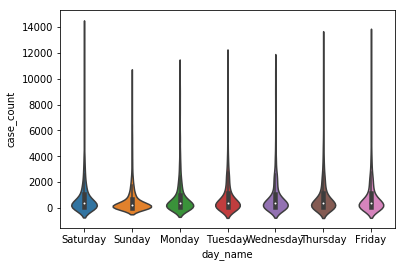

In [126]:
sns.violinplot(x='day_name', y='case_count', data=seg_2_train)

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


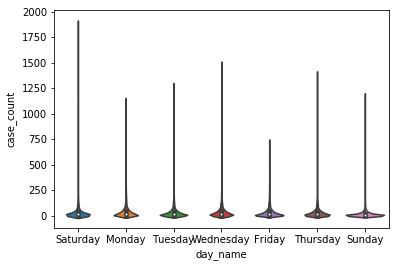

In [129]:
sns.violinplot(x=seg_1_train['day_name'], y=seg_1_train['case_count'])

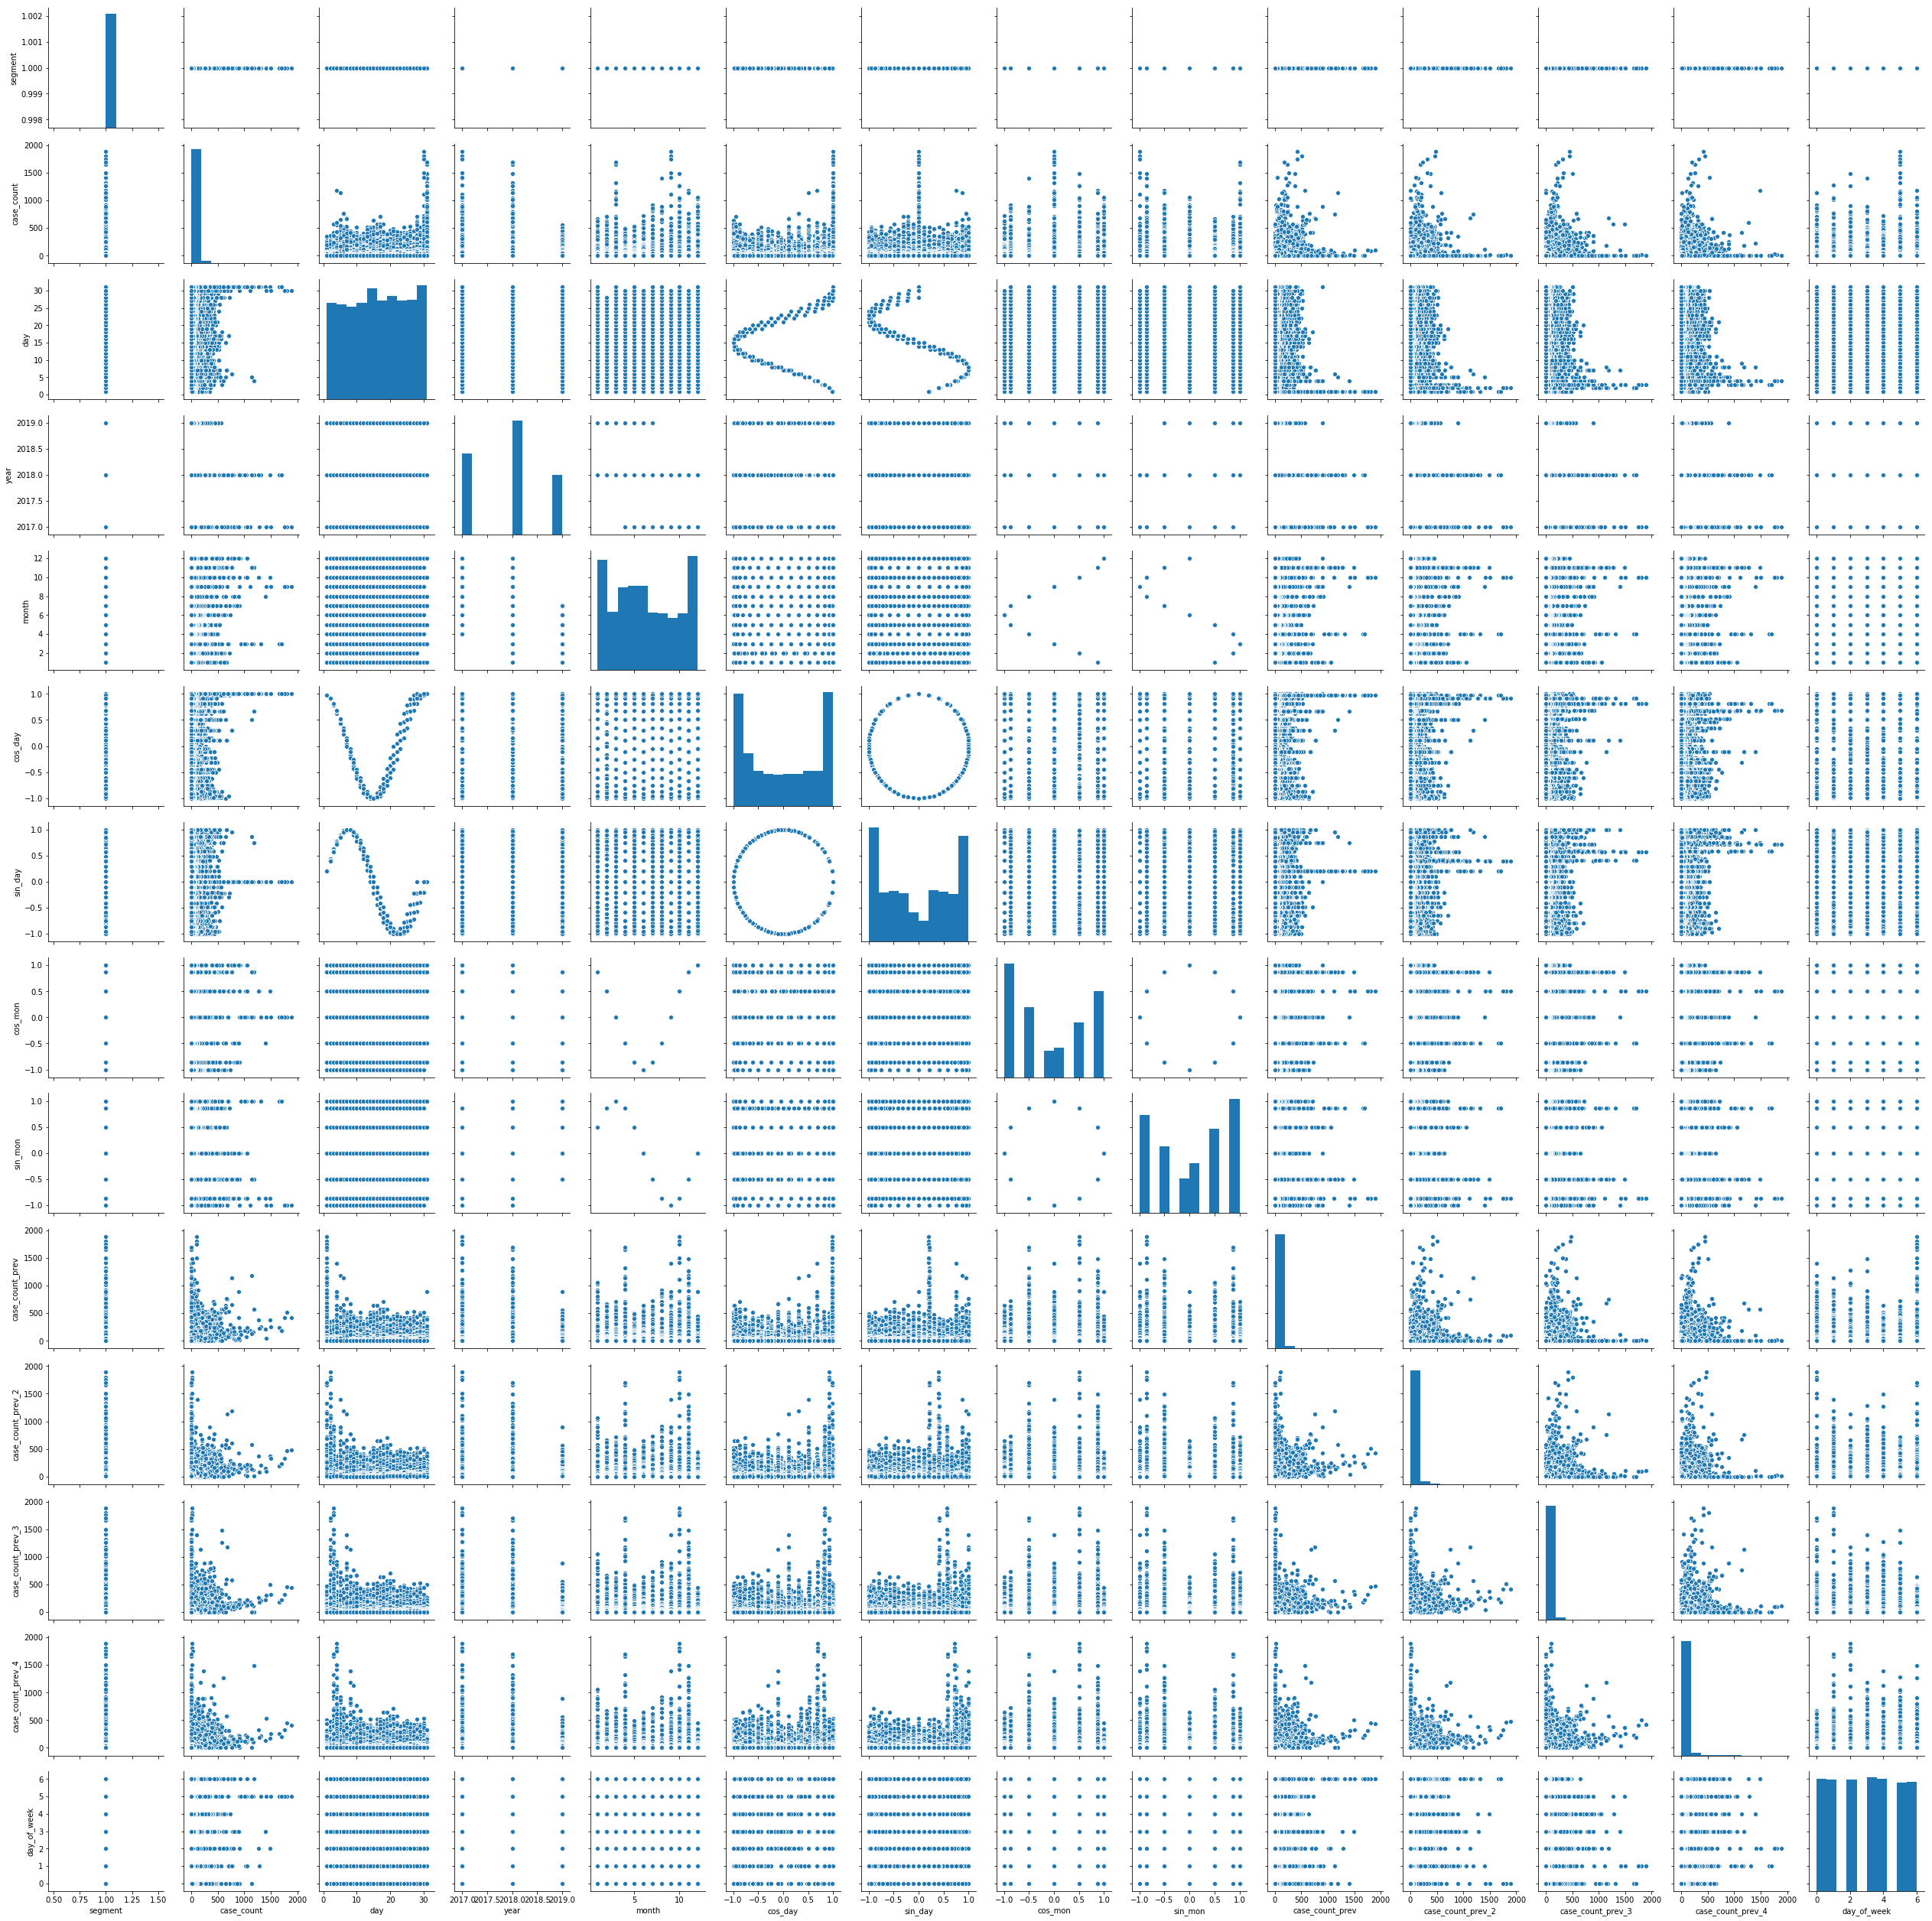

In [133]:
sns.pairplot(seg_1_train)

In [134]:
seg_1_train.columns

Index(['application_date', 'segment', 'case_count', 'day', 'year', 'month',
       'Holiday', 'Type', 'cos_day', 'sin_day', 'cos_mon', 'sin_mon',
       'case_count_prev', 'case_count_prev_2', 'case_count_prev_3',
       'case_count_prev_4', 'day_of_week', 'day_name'],
      dtype='object')

# Testing Categoricals against Target

In [138]:
df = seg_1_train.set_index('application_date')

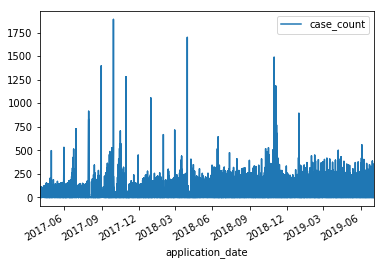

In [142]:
df[['case_count']].plot(fig=(10,10))

In [146]:
seg_1_train[seg_1_train['case_count']<seg_1_train['case_count'].mean()]

,application_date,segment,case_count,day,year,month,Holiday,Type,cos_day,sin_day,cos_mon,sin_mon,case_count_prev,case_count_prev_2,case_count_prev_3,case_count_prev_4,day_of_week,day_name
1,2017-04-03,1,5.0,3,2017,4,NaN,NaN,0.809017,0.587785,-0.500000,0.866025,40.0,0.0,0.0,0.0,0,Monday
2,2017-04-04,1,4.0,4,2017,4,Rama Navami,G,0.669131,0.743145,-0.500000,0.866025,5.0,40.0,0.0,0.0,1,Tuesday
27,2017-05-02,1,17.0,2,2017,5,NaN,NaN,0.918958,0.394356,-0.866025,0.500000,130.0,497.0,127.0,114.0,1,Tuesday
28,2017-05-03,1,11.0,3,2017,5,NaN,NaN,0.820763,0.571268,-0.866025,0.500000,17.0,130.0,497.0,127.0,2,Wednesday
29,2017-05-04,1,18.0,4,2017,5,NaN,NaN,0.688967,0.724793,-0.866025,0.500000,11.0,17.0,130.0,497.0,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68553,2019-07-01,1,6.0,1,2019,7,NaN,NaN,0.979530,0.201299,-0.866025,-0.500000,0.0,3.0,3.0,3.0,0,Monday
68554,2019-07-02,1,3.0,2,2019,7,NaN,NaN,0.918958,0.394356,-0.866025,-0.500000,6.0,0.0,3.0,3.0,1,Tuesday
68555,2019-07-03,1,3.0,3,2019,7,NaN,NaN,0.820763,0.571268,-0.866025,-0.500000,3.0,6.0,0.0,3.0,2,Wednesday
68556,2019-07-04,1,5.0,4,2019,7,Rath Yatra,R,0.688967,0.724793,-0.866025,-0.500000,3.0,3.0,6.0,0.0,3,Thursday


In [252]:
seg_2_train[seg_2_train['case_count']<seg_2_train['case_count'].mean()]

,application_date,segment,case_count,day,year,month,Holiday,Type,cos_day,sin_day,cos_mon,sin_mon,day_of_week,day_name,case_count_prev,case_count_prev_2,case_count_prev_3,case_count_prev_4,Type_Mat,week_num
0,2017-04-01,2,0.0,1,2017,4,NaN,Nope,0.978148,0.207912,-0.500000,0.866025,5,Saturday,0.0,0.0,0.0,0.0,3,13
1,2017-04-02,2,0.0,2,2017,4,NaN,Nope,0.913545,0.406737,-0.500000,0.866025,6,Sunday,0.0,0.0,0.0,0.0,3,13
2,2017-04-03,2,0.0,3,2017,4,NaN,Nope,0.809017,0.587785,-0.500000,0.866025,0,Monday,0.0,0.0,0.0,0.0,3,14
3,2017-04-04,2,0.0,4,2017,4,Rama Navami,G,0.669131,0.743145,-0.500000,0.866025,1,Tuesday,0.0,0.0,0.0,0.0,1,14
4,2017-04-05,2,0.0,5,2017,4,NaN,Nope,0.500000,0.866025,-0.500000,0.866025,2,Wednesday,0.0,0.0,0.0,0.0,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,2019-07-07,2,389.0,7,2019,7,NaN,Nope,0.151428,0.988468,-0.866025,-0.500000,6,Sunday,349.0,469.0,433.0,363.0,3,27
13824,2019-07-08,2,495.0,8,2019,7,NaN,Nope,-0.050649,0.998717,-0.866025,-0.500000,0,Monday,389.0,349.0,469.0,433.0,3,28
13825,2019-07-09,2,615.0,9,2019,7,NaN,Nope,-0.250653,0.968077,-0.866025,-0.500000,1,Tuesday,495.0,389.0,349.0,469.0,3,28
13826,2019-07-10,2,706.0,10,2019,7,NaN,Nope,-0.440394,0.897805,-0.866025,-0.500000,2,Wednesday,615.0,495.0,389.0,349.0,3,28


In [253]:
a1 = [0] + [i for i in seg_2_train['case_count'].iloc[:-1].tolist()]
a2 = [0] + [0] + [i for i in seg_2_train['case_count'].iloc[:-2].tolist()]
a3 = [0] + [0] + [0] + [i for i in seg_2_train['case_count'].iloc[:-3].tolist()]
a4 = [0] + [0] + [0] + [0] + [i for i in seg_2_train['case_count'].iloc[:-4].tolist()]

In [254]:
seg_2_train['case_count_prev'] = a1
seg_2_train['case_count_prev_2'] = a2
seg_2_train['case_count_prev_3'] = a3
seg_2_train['case_count_prev_4'] = a4

In [255]:
train = seg_2_train
test = seg_2_test

In [287]:
test['application_date'] = pd.to_datetime(test['application_date'])
test['day_of_week'] = test['application_date'].apply(lambda x: x.dayofweek)
test['day_name'] = test['application_date'].apply(lambda x: x.day_name())
test['week_num'] = test['application_date'].apply(lambda x: x.week)

In [288]:
train.Type.fillna(value="Nope", inplace=True)
test.Type.fillna(value="Nope", inplace=True)

In [257]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [258]:
la = LabelEncoder()
on = OneHotEncoder()
on2 = OneHotEncoder()

In [259]:
train['Type_Mat'] = la.fit_transform(train['Type'])

In [260]:
type_mat = on.fit_transform(train['Type_Mat'].values.reshape(-1,1))
day_mat = on2.fit_transform(train['day_of_week'].values.reshape(-1,1))

In [261]:
type_mat = type_mat.todense()
day_mat = day_mat.todense()

In [266]:
mat = np.append(type_mat, day_mat, axis=1)

In [267]:
mat = np.append(mat, train['day'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['week_num'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['month'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['year'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['sin_mon'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['cos_mon'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['sin_day'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, train['cos_day'].values.reshape(-1, 1), axis=1)
mat = np.append(mat, np.log1p(train['case_count_prev'].values.reshape(-1, 1)), axis=1)
mat = np.append(mat, np.log1p(train['case_count_prev_2'].values.reshape(-1, 1)), axis=1)
mat = np.append(mat, np.log1p(train['case_count_prev_3'].values.reshape(-1, 1)), axis=1)
mat = np.append(mat, np.log1p(train['case_count_prev_4'].values.reshape(-1, 1)), axis=1)

In [268]:
mat.shape

(13840, 26)

In [269]:
mat

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 7.54274355, 7.786967  ,
         7.8644199 ],
        [0.        , 0.        , 0.        , ..., 7.30047281, 7.54274355,
         7.786967  ],
        [0.        , 0.        , 0.        , ..., 6.93634274, 7.30047281,
         7.54274355]])

In [270]:
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# import lightgbm as lgb

In [271]:
X_train, X_test, y_train, y_test = train_test_split(mat, np.log1p(train['case_count']), test_size=0.33, random_state=42)

In [272]:
rf = RandomForestRegressor(n_estimators=100)
ls = Lasso()
hu = HuberRegressor()

In [273]:
rf.fit(X_train, y_train)
ls.fit(X_train, y_train)
hu.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [274]:
rf_pred = np.round(np.expm1(rf.predict(X_test)))
ls_pred = np.round(np.expm1(ls.predict(X_test)))
et_pred = np.round(np.expm1(hu.predict(X_test)))

In [275]:
[mean_absolute_error(np.expm1(y_test), rf_pred) * (100/len(y_test)), 
mean_absolute_error(np.expm1(y_test), ls_pred) * (100/len(y_test)),
mean_absolute_error(np.expm1(y_test), et_pred) * (100/len(y_test))]

[4.373294884692416, 8.620838713536028, 5.070705256394135]

In [276]:
xtest = train.iloc[y_test.index].reset_index(drop=True)

In [277]:
# xtest['true'] = np.expm1(y_test.values)
xtest['pred_rf'] = rf_pred
xtest['pred_ls'] = ls_pred
xtest['pred_hu'] = et_pred

In [278]:
xtest[['case_count', 'case_count_prev', 'case_count_prev_2', 'case_count_prev_3', 'case_count_prev_4', 'pred_rf', 'pred_ls', 'pred_hu']]

,case_count,case_count_prev,case_count_prev_2,case_count_prev_3,case_count_prev_4,pred_rf,pred_ls,pred_hu
0,75.0,30.0,66.0,100.0,43.0,43.0,42.0,27.0
1,322.0,216.0,140.0,328.0,330.0,213.0,194.0,196.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,343.0,142.0,344.0,262.0,336.0,173.0,146.0,163.0
4,181.0,2716.0,5610.0,6050.0,7031.0,3236.0,1796.0,3123.0
...,...,...,...,...,...,...,...,...
4563,708.0,1023.0,1379.0,2193.0,2999.0,710.0,753.0,999.0
4564,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4565,58.0,179.0,401.0,768.0,861.0,85.0,177.0,134.0
4566,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [279]:
test.head()

,id,application_date,segment,day,year,month,Holiday,Type,cos_mon,sin_mon,cos_day,sin_day
0,88,2019-07-24,2,24,2019,7,NaN,Nope,-0.866025,-0.5,0.151428,-0.988468
1,89,2019-07-25,2,25,2019,7,NaN,Nope,-0.866025,-0.5,0.347305,-0.937752
2,90,2019-07-26,2,26,2019,7,NaN,Nope,-0.866025,-0.5,0.528964,-0.848644
3,91,2019-07-27,2,27,2019,7,NaN,Nope,-0.866025,-0.5,0.688967,-0.724793
4,92,2019-07-28,2,28,2019,7,NaN,Nope,-0.866025,-0.5,0.820763,-0.571268


In [333]:
pd.DataFrame(rf.feature_importances_)

,0
0,0.000008
1,0.000335
2,0.000021
3,0.000658
4,0.000091
5,0.000344
6,0.000071
7,0.000544
8,0.000420
9,0.000405


In [289]:
test['Type_Mat'] = la.fit_transform(test['Type'])
type_mat_test = on.transform(test['Type_Mat'].values.reshape(-1,1))
day_mat_test = on2.transform(test['day_of_week'].values.reshape(-1,1))

In [291]:
type_mat_test = type_mat_test.todense()
day_mat_test = day_mat_test.todense()

In [292]:
mat_test = np.append(type_mat_test, day_mat_test, axis=1)

In [293]:
mat_test = np.append(mat_test, test['day'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['week_num'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['month'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['year'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['sin_mon'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['cos_mon'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['sin_day'].values.reshape(-1, 1), axis=1)
mat_test = np.append(mat_test, test['cos_day'].values.reshape(-1, 1), axis=1)

In [295]:
mat.shape, mat_test.shape

((13840, 26), (93, 22))

In [339]:
a = []
for i in range(len(mat_test)):
    print(i)
    if i ==0:
        k = np.append(np.array(mat_test[i]), np.log1p(np.array([[1480., 1028., 1946., 1984.]])), axis=1)
#         a.append(np.round(np.expm1(rf.predict(k))))
    if i==1:
        k = np.append(np.array(mat_test[i]), np.array([[a[0],0,0,0]]), axis=1)
#         a.append(np.round(np.expm1(rf.predict(k))))
    if i==2:
        k = np.append(np.array(mat_test[i]), np.array([[a[1],a[0],0,0]]), axis=1)
#         a.append(np.round(np.expm1(rf.predict(k))))
    if i==3:
        k = np.append(np.array(mat_test[i]), np.array([[a[2],a[1],a[0],0]]), axis=1)
#         a.append(np.round(np.expm1(rf.predict(k))))
    if i>3:
        k = np.append(np.array(mat_test[i]), np.array([[a[i-1],a[i-2],a[i-3],a[i-4]]]), axis=1)
    
    a.append(np.round(np.expm1(rf.predict(k)))[0])
        
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


451741.0

In [329]:
test['case_count'] = a

In [330]:
test

,id,application_date,segment,day,year,month,Holiday,Type,cos_mon,sin_mon,cos_day,sin_day,Type_Mat,day_of_week,day_name,week_num,case_count
0,88,2019-07-24,2,24,2019,7,NaN,Nope,-0.866025,-0.500000,0.151428,-0.988468,1,2,Wednesday,30,0.0
1,89,2019-07-25,2,25,2019,7,NaN,Nope,-0.866025,-0.500000,0.347305,-0.937752,1,3,Thursday,30,0.0
2,90,2019-07-26,2,26,2019,7,NaN,Nope,-0.866025,-0.500000,0.528964,-0.848644,1,4,Friday,30,0.0
3,91,2019-07-27,2,27,2019,7,NaN,Nope,-0.866025,-0.500000,0.688967,-0.724793,1,5,Saturday,30,0.0
4,92,2019-07-28,2,28,2019,7,NaN,Nope,-0.866025,-0.500000,0.820763,-0.571268,1,6,Sunday,30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,176,2019-10-20,2,20,2019,10,NaN,Nope,0.500000,-0.866025,-0.612106,-0.790776,1,6,Sunday,42,7408.0
89,177,2019-10-21,2,21,2019,10,NaN,Nope,0.500000,-0.866025,-0.440394,-0.897805,1,0,Monday,43,11313.0
90,178,2019-10-22,2,22,2019,10,NaN,Nope,0.500000,-0.866025,-0.250653,-0.968077,1,1,Tuesday,43,11880.0
91,179,2019-10-23,2,23,2019,10,NaN,Nope,0.500000,-0.866025,-0.050649,-0.998717,1,2,Wednesday,43,11962.0


In [331]:
test[['id','application_date','segment','case_count']].to_csv('pred_prev_seg_2.csv', index=False)

In [343]:
max(train['application_date'])

Timestamp('2019-07-23 00:00:00')

In [345]:
min(test['application_date'])

Timestamp('2019-07-24 00:00:00')

In [354]:
train['case_count'].iloc[-4:].values

array([1480., 1028., 1946., 1984.])

In [356]:
np.log1p(np.array([[1480., 1028., 1946., 1984.]]))

array([[7.30047281, 6.93634274, 7.57404501, 7.59337419]])

In [357]:
train.tail()

,application_date,segment,case_count,day,year,month,Holiday,Type,cos_day,sin_day,cos_mon,sin_mon,day_of_week,day_name,case_count_prev,case_count_prev_2,case_count_prev_3,case_count_prev_4,Type_Mat,week_num
13835,2019-07-19,2,1886.0,19,2019,7,NaN,Nope,-0.758758,-0.651372,-0.866025,-0.5,4,Friday,2408.0,2602.0,2665.0,2205.0,3,29
13836,2019-07-20,2,1480.0,20,2019,7,NaN,Nope,-0.612106,-0.790776,-0.866025,-0.5,5,Saturday,1886.0,2408.0,2602.0,2665.0,3,29
13837,2019-07-21,2,1028.0,21,2019,7,NaN,Nope,-0.440394,-0.897805,-0.866025,-0.5,6,Sunday,1480.0,1886.0,2408.0,2602.0,3,29
13838,2019-07-22,2,1946.0,22,2019,7,NaN,Nope,-0.250653,-0.968077,-0.866025,-0.5,0,Monday,1028.0,1480.0,1886.0,2408.0,3,30
13839,2019-07-23,2,1984.0,23,2019,7,NaN,Nope,-0.050649,-0.998717,-0.866025,-0.5,1,Tuesday,1946.0,1028.0,1480.0,1886.0,3,30
